In [1]:
import torch
from torch.autograd import Variable
from torchvision import models

# 一、torch.nn.init初始化方法

In [ ]:
# torch.nn.init
# torch.nn.init.calculate_gain(nonlinearity, parm=None), nonlinearity:非线性函数名,param:非线性函数的可选参数
# gain = {'linear':1, 'conv1,2,3d':1, 'sigmoid':1, 'relu':sqrt(2), 'tanh':5/3, 'leaky_relu'}
gain = torch.nn.init.calculate_gain('leaky_relu')
gain

In [15]:
# torch.nn.init.uniform_(tensor, a=0, b=1),均匀分布填充
w = torch.empty(3, 5)
torch.nn.init.uniform_(w, a=0, b=0.01)

tensor([[4.1217e-05, 9.5258e-03, 8.3051e-03, 5.8025e-03, 9.6408e-03],
        [8.1482e-03, 2.2989e-03, 5.5018e-03, 2.9738e-03, 3.4717e-03],
        [5.4090e-04, 8.6283e-03, 1.1739e-03, 5.5241e-03, 2.4721e-03]])

In [17]:
# torch.nn.init.normal_(tensor, mean=0, std=1),正态分布填充
w = torch.empty(3, 5)
torch.nn.init.normal_(w, mean=0, std=0.01)

tensor([[ 0.0161, -0.0107,  0.0207, -0.0051, -0.0067],
        [ 0.0019,  0.0170,  0.0018,  0.0019,  0.0018],
        [-0.0039,  0.0013, -0.0083,  0.0019, -0.0149]])

In [ ]:
# 常数初始化
# torch.nn.init.constant_(tensor, val)
# torch.nn.init.ones_(tensor)
# torch.nn.init.zeros_(tensor)
# torch.nn.init.eye_(tensor) 用单位矩阵来填充2维tensor

In [20]:
# torch.nn.init.xavier.uniform_(tensor, gain=1.0)
w = torch.empty(3, 5)
torch.nn.init.xavier_uniform_(w)

tensor([[ 0.4089, -0.5843, -0.7066, -0.2973, -0.5284],
        [-0.4652,  0.2907, -0.3023, -0.5303,  0.3372],
        [-0.3375, -0.6604, -0.1508, -0.3726, -0.3643]])

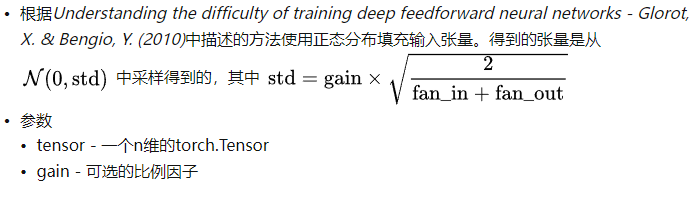

In [21]:
# torch.nn.init.xavier_normal_(tensor, gain=1.0)
w = torch.empty(3, 5)
torch.nn.init.xavier_normal_(w, gain=2)

tensor([[ 0.7890, -1.1898, -0.2550,  0.4975, -0.2582],
        [-0.6445, -0.1228,  0.8817,  2.1915,  0.8963],
        [ 1.7161,  1.4394, -1.1092, -0.4813, -1.7168]])

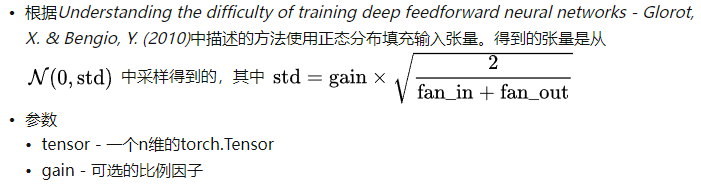

In [22]:
# torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
w = torch.empty(3, 5)
torch.nn.init.kaiming_uniform(w, a=0)

C:\Users\XIAOQI~1\AppData\Local\Temp/ipykernel_25308/3318102201.py:3: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(w, a=0)


tensor([[-0.7247, -0.1285,  0.6740, -0.6097, -0.0314],
        [ 0.0402,  0.9268,  1.0885,  0.6236, -0.6356],
        [-0.8586, -0.3294, -0.4577,  0.3493,  0.7572]])

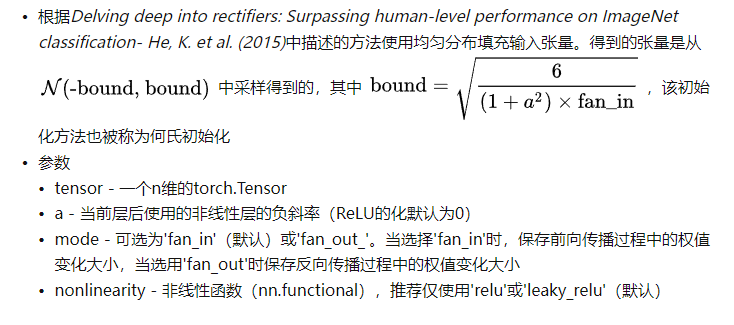

In [23]:
# torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
w = torch.empty(3, 5)
torch.nn.init.kaiming_normal_(w, a=0, mode='fan_out', nonlinearity='relu')

tensor([[ 0.2278, -0.2137,  0.0606, -0.9206, -0.2163],
        [ 0.4201, -0.9343, -0.6396,  1.8974, -0.6560],
        [-1.0564, -0.7175, -0.9794, -0.4078, -0.1163]])

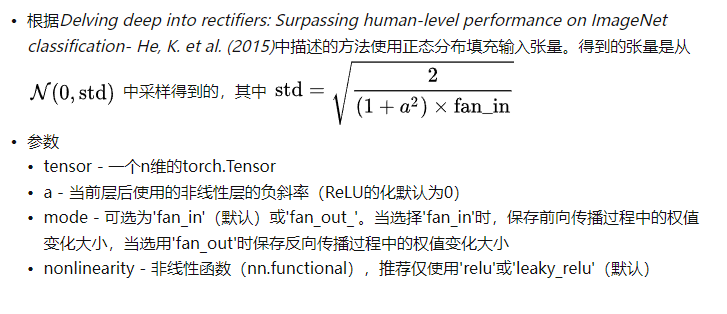

# 二、模型初始化方法

In [5]:
# 方法一：定义初始化函数，利用net.apply进行初始化
def weights_init(m, mean=0, stddev=0.1):
    classname = m.__class__.__name__
    if classname.find('conv2d') != -1:
        m.weight.data.normal_(mean, stddev)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(mean, stddev)
        m.bias.data.zero_()

net = models.resnet50()
net.apply(weights_init)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [1]:
# 方法二 利用参数名称初始化
from torchvision import models
from torch import nn
net = models.resnet50(pretrained=False)
for name, param in net.named_parameters():
    if name.startswith('weight'):
        nn.init.xavier_normal_(param)
    else:
        nn.init.zeros_(param)

In [4]:
# 方法三 在模型定义过程中利用__init__实现模型初始化
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net,self).__init__()
        self.net = nn.Sequential(nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=1, bias=False), nn.BatchNorm2d(64), 
                                nn.ReLU(inplace=True))
        # 对定义的模型进行初始化
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    def forward(self, x):
        output = self.net(x)
net = Net(10)
for name, param in net.named_parameters():
    print(name, param)

net.0.weight Parameter containing:
tensor([[[[-2.6778e-01, -1.2574e-01,  3.1365e-01],
          [-1.3866e-01,  6.7477e-01,  1.4720e-01],
          [-4.5842e-01,  2.9110e-01, -6.0219e-01]],

         [[-1.7876e-02, -1.9477e-01,  1.3935e-01],
          [-1.1612e-01, -8.4532e-02,  6.0775e-02],
          [ 1.3632e-01,  4.0818e-01, -4.9710e-01]],

         [[ 1.4750e-01,  2.4066e-01, -2.6715e-01],
          [-1.2804e-01, -7.5100e-03, -2.3588e-01],
          [-1.5330e-01, -2.7900e-01,  3.2290e-02]]],


        [[[-3.5421e-01, -2.2231e-01, -5.2092e-01],
          [-1.3666e-01, -1.4182e-01, -7.1701e-01],
          [-1.8505e-01,  9.8485e-02, -4.7635e-01]],

         [[-1.1888e-01,  1.6723e-01,  3.7906e-02],
          [-2.5544e-01, -2.3427e-02,  5.5718e-01],
          [-1.6596e-01,  5.9636e-02, -4.7729e-01]],

         [[ 1.2128e-01, -4.8364e-03, -3.0801e-02],
          [-2.5411e-01, -3.1301e-01,  5.4865e-02],
          [ 4.7190e-01,  1.1991e-01,  1.6131e-03]]],


        [[[ 3.5097e-01,  1.3235

In [5]:
# 模型参数初始化
def weights_init(net, init_type='normal', init_gain=0.02):
    def init_func(m):
        classname = m.__class__.__name__
        if hasattr(m, 'weight') and classname.find('Conv') != -1:
            if init_type == 'normal':
                torch.nn.init.normal_(m.weight.data, 0.0, init_gain)
            elif init_type == 'xavier':
                torch.nn.init.xavier_normal_(m.weight.data, gain=init_gain)
            elif init_type == 'kaiming':
                torch.nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
            elif init_type == 'orthogonal':
                torch.nn.init.orthogonal_(m.weight.data, gain=init_gain)
            else:
                raise NotImplementedError('init type error')
        elif classname.find('BatchNorm2d') != -1:
            torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
            torch.nn.init.constant_(m.bias.data, 0.0)
    net.apply(init_func)

In [6]:
# 加载已训练好的模型权重
# net.load_state_dict(torch.load(model_path, map_location=device))


In [7]:
# 加载部分权重
model_dict = model.state_dict()
pretrained_dict = torch.load(model_path, map_location=device)
pretrained_dict = {k: v for k, v in pretrained_dict.items() if np.shape(model_dict[k])==np.shape(v)}
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

NameError: name 'model' is not defined

In [1]:
# net.named_parameters()
# net.parameters()
# net.state_dict()
# net.state_dict().items()
# net.modules()
# net.named_modules()
# net._modules().items()
# net.children()